<a href="https://colab.research.google.com/github/agnxsh/MNIST-with-logistic-regression/blob/main/mnist_with_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Here, we solve an Image Classification problem with PyTorch and Basic Linear Regression

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
dataset = MNIST(root='data/',download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(dataset)

60000

###In addition to the 60000 images we have for training the model, we have an additional 10000 datasets to test the model as well

In [ ]:
test_dataset=MNIST(root='data/',train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FDF2D66DD10>, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


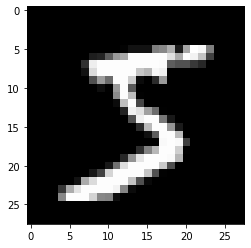

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print("Label:",label)

Label:  3


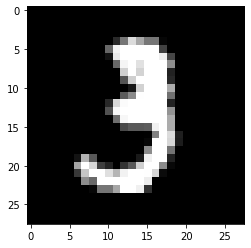

In [ ]:
image, label = dataset[10]
plt.imshow(image,cmap='gray')
print("Label: ",label)

In [ ]:
import torchvision.transforms as transforms


In [ ]:
dataset =  MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [ ]:
imgTensor, label = dataset[0]
print(imgTensor.shape,label)

torch.Size([1, 28, 28]) 5


In [ ]:
print(imgTensor[0,10:15,10:15])

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


In [ ]:
print(torch.max(imgTensor),torch.min(imgTensor));


tensor(1.) tensor(0.)


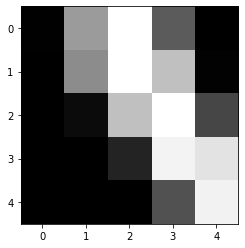

In [ ]:
plt.imshow(imgTensor[0,10:15,10:15],cmap='gray');

###Training and Validation Datasets

In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader
batch_size=128
train_loader = DataLoader(train_ds, batch_size, shuffle=True);
val_loader = DataLoader(val_ds,batch_size)

##Logistic Regression with Torch.nn

In [ ]:
import torch.nn as nn

input_size = 28*28
num_classes =10
model = nn.Linear(input_size, num_classes)


In [ ]:
print(model.weight.shape)

torch.Size([10, 784])


In [ ]:
model.weight

Parameter containing:
tensor([[ 0.0041,  0.0094, -0.0129,  ..., -0.0295,  0.0301,  0.0221],
        [-0.0117, -0.0262,  0.0131,  ..., -0.0170, -0.0005,  0.0099],
        [-0.0005,  0.0119, -0.0146,  ..., -0.0283, -0.0140,  0.0011],
        ...,
        [-0.0052, -0.0223, -0.0213,  ..., -0.0349,  0.0348, -0.0301],
        [-0.0351, -0.0198, -0.0022,  ...,  0.0321,  0.0114,  0.0120],
        [ 0.0311,  0.0308,  0.0305,  ..., -0.0250,  0.0014,  0.0197]],
       requires_grad=True)

In [ ]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0151, -0.0280,  0.0113,  0.0244,  0.0082,  0.0095, -0.0094,  0.0004,
        -0.0028,  0.0008], requires_grad=True)

In [ ]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs=model(images)
  print(outputs)
  break

tensor([2, 2, 8, 4, 7, 5, 1, 8, 2, 6, 3, 6, 0, 7, 8, 0, 5, 6, 8, 3, 2, 6, 2, 8,
        2, 5, 7, 3, 6, 2, 0, 0, 9, 9, 9, 2, 1, 8, 8, 4, 1, 9, 3, 2, 3, 7, 1, 5,
        1, 8, 0, 5, 3, 4, 6, 1, 1, 8, 8, 9, 3, 6, 6, 3, 7, 7, 0, 2, 2, 4, 8, 5,
        4, 9, 9, 4, 1, 3, 5, 7, 1, 1, 0, 3, 1, 1, 1, 6, 1, 3, 2, 7, 2, 2, 1, 0,
        8, 6, 3, 6, 0, 0, 6, 8, 2, 1, 6, 7, 7, 3, 5, 5, 7, 1, 1, 9, 0, 5, 4, 8,
        9, 1, 5, 8, 1, 2, 3, 1])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [ ]:
images.shape

torch.Size([128, 1, 28, 28])

In [ ]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  
  def forward(self, xb):
    xb = xb .reshape(-1,784)
    out=self.linear(xb)
    return out

model = MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0237, -0.0324, -0.0165,  ..., -0.0042,  0.0095,  0.0118],
         [-0.0132,  0.0248, -0.0101,  ..., -0.0224,  0.0180, -0.0072],
         [-0.0187, -0.0083,  0.0033,  ...,  0.0285, -0.0015, -0.0184],
         ...,
         [ 0.0153, -0.0140,  0.0349,  ...,  0.0351,  0.0213,  0.0145],
         [ 0.0173,  0.0253,  0.0274,  ..., -0.0229,  0.0264,  0.0091],
         [ 0.0027,  0.0308, -0.0211,  ...,  0.0268, -0.0100, -0.0162]],
        requires_grad=True), Parameter containing:
 tensor([-0.0274,  0.0045, -0.0048, -0.0073,  0.0272,  0.0241, -0.0258, -0.0080,
         -0.0302, -0.0016], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
  print(images.shape)
  outputs=model(images)
  break
print("outputs shape: ",outputs.shape)
print("Sample outputs: \n", outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[-0.1300,  0.0797, -0.1949,  0.1511,  0.0712,  0.3303,  0.0475,  0.1117,
          0.0732,  0.6009],
        [-0.0571,  0.0284,  0.4360,  0.2645,  0.2916,  0.3514, -0.2654, -0.2995,
          0.0803,  0.2083]])


In [ ]:
import torch.nn.functional as fun

In [ ]:
outputs[:2]

tensor([[-0.1300,  0.0797, -0.1949,  0.1511,  0.0712,  0.3303,  0.0475,  0.1117,
          0.0732,  0.6009],
        [-0.0571,  0.0284,  0.4360,  0.2645,  0.2916,  0.3514, -0.2654, -0.2995,
          0.0803,  0.2083]], grad_fn=<SliceBackward0>)

In [ ]:
probs = fun.softmax(outputs, dim=1)
print("Sample Probabilities: \n", probs[:2].data)
print("sum = ",torch.sum(probs[0]).item())

Sample Probabilities: 
 tensor([[0.0765, 0.0943, 0.0717, 0.1013, 0.0935, 0.1212, 0.0914, 0.0974, 0.0937,
         0.1589],
        [0.0828, 0.0902, 0.1356, 0.1142, 0.1174, 0.1246, 0.0672, 0.0650, 0.0950,
         0.1080]])
sum =  1.0
